# Team Members:
- Amir Mobayen
- Leelav Kareem
- Nikita Chistyakov

## Topic:
A Recurrent Neural Network, based on LSTM or GRU

## Libraries

In [60]:
# Basic packages
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

tf.get_logger().setLevel('ERROR')


# About the dataset:
List of tweet texts with emotion labels like joy, sadness, fear, anger…
Dataset is split into train, test and validation sets for building the machine learning model. At first, you are
given only train and test sets. The validation one will be given in the end of the project for you to check
the final performance of your algorithm (to make sure there is no overfitting over the test data).
You can work on this project on group of one, two or three students. This exercise is mandatory, not
giving it back is equivalent to getting to lowest grade

# Goal:
- Train different kind of models able to classify each text according to the sentiment mainly present
in it
- Compare the results of your different models and try to analyze and explain the differences

# Parameters

In [61]:
data_file = './NLP_exam_emotions_dataset/train.txt'
test_flie = './NLP_exam_emotions_dataset/test.txt'

# Preparing Dataset

In [62]:
train_data = pd.read_csv(data_file, delimiter=';', header=0)
test_data = pd.read_csv(test_flie, delimiter=';', header=0)

train_data.head(), test_data.head()

(                             i didnt feel humiliated  sadness
 0  i can go from feeling so hopeless to so damned...  sadness
 1   im grabbing a minute to post i feel greedy wrong    anger
 2  i am ever feeling nostalgic about the fireplac...     love
 3                               i am feeling grouchy    anger
 4  ive been feeling a little burdened lately wasn...  sadness,
   im feeling rather rotten so im not very ambitious right now  sadness
 0          im updating my blog because i feel shitty           sadness
 1  i never make her separate from me because i do...           sadness
 2  i left with my bouquet of red and yellow tulip...               joy
 3    i was feeling a little vain when i did this one           sadness
 4  i cant walk into a shop anywhere where i do no...              fear)

In [63]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15999 entries, 0 to 15998
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   i didnt feel humiliated  15999 non-null  object
 1   sadness                  15999 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   im feeling rather rotten so im not very ambitious right now  1999 non-null   object
 1   sadness                                                      1999 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


(None, None)

In [64]:
def tokenizer(text, max_len=None):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    vocab_size = len(tokenizer.word_index) + 1
    if not max_len:
        max_len = max([len(seq) for seq in sequences])
    return pad_sequences(sequences, maxlen=max_len), max_len, vocab_size

In [65]:
train_x, max_len, vocab_size = tokenizer(train_data.iloc[:, 0])
test_x, _, _ = tokenizer(test_data.iloc[:, 0], max_len)

In [66]:
label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_data.iloc[:, 1])
test_y = label_encoder.transform(test_data.iloc[:, 1])
len_label = len(np.unique(train_y))
train_y, test_y

(array([4, 0, 3, ..., 2, 0, 4]), array([4, 4, 2, ..., 2, 2, 1]))

# Model

In [67]:
# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 100, input_length=max_len))
model.add(tf.keras.layers.Conv1D(128, 5, activation='elu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=32))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=False)))
model.add(tf.keras.layers.Dense(64, activation='elu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(len_label, activation='softmax'))

model.summary()

2023-07-23 11:39:06.992334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 11:39:06.993249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 11:39:06.993857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 100)           1521300   
                                                                 
 conv1d (Conv1D)             (None, 62, 128)           64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 128)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 1, 128)           74496     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                        

2023-07-23 11:39:07.194058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 11:39:07.195217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 11:39:07.195909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [68]:
tf.keras.backend.clear_session()

early = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y,
                    epochs=30,
                    batch_size=32,
                    # validation_data= [test_x,test_y],
                    validation_split=0.1,
                    callbacks=[early])

Epoch 1/30


2023-07-23 11:39:07.575366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 11:39:07.576725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 11:39:07.577880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

447/450 [============================>.] - ETA: 0s - loss: 1.5892 - accuracy: 0.3245

2023-07-23 11:39:19.516630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 11:39:19.517898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 11:39:19.518825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

450/450 [==============================] - 13s 19ms/step - loss: 1.5887 - accuracy: 0.3245 - val_loss: 1.5781 - val_accuracy: 0.3187
Epoch 2/30
450/450 [==============================] - 7s 16ms/step - loss: 1.5788 - accuracy: 0.3343 - val_loss: 1.5724 - val_accuracy: 0.3194
Epoch 3/30
450/450 [==============================] - 7s 16ms/step - loss: 1.5516 - accuracy: 0.3414 - val_loss: 1.5974 - val_accuracy: 0.3187
Epoch 4/30
450/450 [==============================] - 7s 16ms/step - loss: 1.4944 - accuracy: 0.3667 - val_loss: 1.6195 - val_accuracy: 0.3194
Epoch 5/30
450/450 [==============================] - 7s 16ms/step - loss: 1.4302 - accuracy: 0.3974 - val_loss: 1.6944 - val_accuracy: 0.3175
Epoch 6/30
450/450 [==============================] - 7s 16ms/step - loss: 1.4042 - accuracy: 0.4052 - val_loss: 1.7299 - val_accuracy: 0.3169
Epoch 7/30
450/450 [==============================] - 7s 16ms/step - loss: 1.3961 - accuracy: 0.4110 - val_loss: 1.7905 - val_accuracy: 0.3094
Epoch 8/3

# Evaluation

In [69]:
loss, accuracy = model.evaluate(test_x, test_y)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

2023-07-23 11:40:17.998757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 11:40:18.000381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 11:40:18.001468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

63/63 [==============================] - 1s 2ms/step - loss: 1.5653 - accuracy: 0.3452
Test Loss: 1.5652753114700317
Test Accuracy: 0.34517258405685425


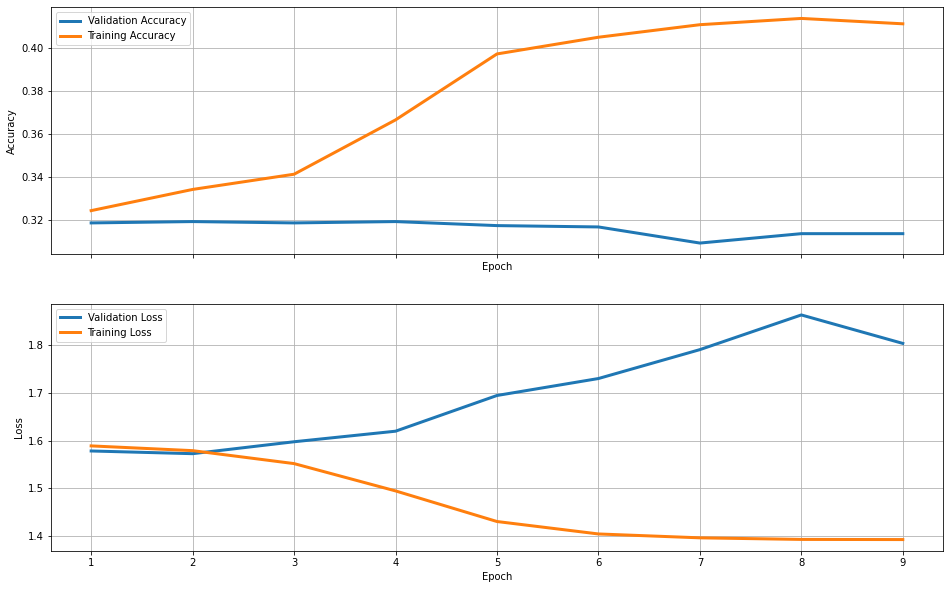

In [70]:
def plot_results(history):
    hist_df = pd.DataFrame(history.history)
    hist_df.columns = ["loss", "accuracy", "val_loss", "val_accuracy"]
    hist_df.index = np.arange(1, len(hist_df) + 1)

    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
    axs[0].plot(hist_df.val_accuracy, lw=3, label='Validation Accuracy')
    axs[0].plot(hist_df.accuracy, lw=3, label='Training Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].grid()
    axs[0].legend(loc=0)
    axs[1].plot(hist_df.val_loss, lw=3, label='Validation Loss')
    axs[1].plot(hist_df.loss, lw=3, label='Training Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].grid()
    axs[1].legend(loc=0)

    plt.show();


plot_results(history)

# Sample Test

In [71]:
count = 0
sample_range = 100
for i in range(sample_range):
    sample = test_data.iloc[i, 0]
    sample_test, _, _ = tokenizer([sample])  # Tokenize the sample as a list

    sample_test = pad_sequences(sample_test, maxlen=max_len)  # Pad the sequence to match max_len
    test_predict = model.predict(sample_test)
    prediction = np.argmax(test_predict)

    # After obtaining the predicted class index
    predicted_label = label_encoder.inverse_transform([prediction])[0]
    true_label = test_data.iloc[i, 1]
    if predicted_label == true_label:
        count += 1
    print(f'Predicted class vs True Class: [{predicted_label}, {true_label}]')

print(f'\nsample accuracy = {count / sample_range}')

2023-07-23 11:40:19.146485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 11:40:19.147846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 11:40:19.148859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 891ms/step
Predicted class vs True Class: [joy, sadness]
1/1 [==============================] - 0s 13ms/step
Predicted class vs True Class: [joy, sadness]
1/1 [==============================] - 0s 12ms/step
Predicted class vs True Class: [joy, joy]
1/1 [==============================] - 0s 12ms/step
Predicted class vs True Class: [joy, sadness]
1/1 [==============================] - 0s 12ms/step
Predicted class vs True Class: [joy, fear]
1/1 [==============================] - 0s 16ms/step
Predicted class vs True Class: [joy, anger]
1/1 [==============================] - 0s 17ms/step
Predicted class vs True Class: [joy, joy]
1/1 [==============================] - 0s 12ms/step
Predicted class vs True Class: [joy, joy]
1/1 [==============================] - 0s 13ms/step
Predicted class vs True Class: [joy, anger]
1/1 [==============================] - 0s 13ms/step
Predicted class vs True Class: [joy, fear]
1/1 [==============================] - 0s